In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [278]:
subj_df = pd.read_json('SEmazePilotData/Data/SUBJ19/Maze__Device_Data_Unity_C_Sharp_Client_VR__.json')

In [279]:
subj_df = subj_df[subj_df['currentscene']=='BigMaze']

In [280]:
subj_df = subj_df[subj_df['trialnum']<21]

In [281]:
all_x_list = []
all_y_list = []
all_z_list = []

trial_x_list = []
trial_y_list = []
trial_z_list = []

shocks_list = []

trialnum=0
for i in range(len(subj_df)):
    if (trialnum != subj_df.iloc[i].trialnum):
#         print(trialnum, subj_df.iloc[i].trialnum)
        all_x_list.append(trial_x_list)
        all_y_list.append(trial_y_list)
        all_z_list.append(trial_z_list)
        trial_x_list = []
        trial_y_list = []
        trial_z_list = []
        shocks_list.append(subj_df.iloc[i-1].numshocks)
        trialnum = subj_df.iloc[i].trialnum
    trial_x_list.append(subj_df.iloc[i].head_position[0])
    trial_y_list.append(subj_df.iloc[i].head_position[1])
    trial_z_list.append(subj_df.iloc[i].head_position[2])

In [282]:
len(shocks_list)

20

In [283]:
len(all_x_list)

20

In [284]:
flat_all_x = [item for sublist in all_x_list for item in sublist]
flat_all_z = [item for sublist in all_z_list for item in sublist]

In [285]:
# Centres: 2,7,...

x_edges = np.arange(-0.5, 40, 5)
z_edges = np.arange(-0.5, 45, 5)

In [286]:
H, _, _ = np.histogram2d(flat_all_x, flat_all_z, bins=(x_edges, z_edges))

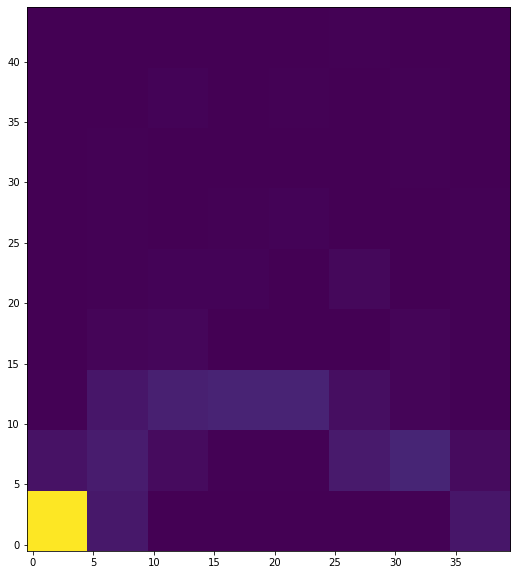

In [287]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(H.T, interpolation='nearest', origin='lower',

        extent=[x_edges[0], x_edges[-1], z_edges[0], z_edges[-1]])

In [288]:
np.arange(-0.5, 40, 5)

array([-0.5,  4.5,  9.5, 14.5, 19.5, 24.5, 29.5, 34.5, 39.5])

In [289]:
x_centres = np.arange(-0.5, 40, 5) + 2.5
z_centres = np.arange(-0.5, 45, 5) + 2.5

In [290]:
x_centres, z_centres

(array([ 2.,  7., 12., 17., 22., 27., 32., 37., 42.]),
 array([ 2.,  7., 12., 17., 22., 27., 32., 37., 42., 47.]))

In [291]:
x_edges = np.arange(-0.5, 40, 5)
z_edges = np.arange(-0.5, 45, 5)

In [292]:
def disc(x, edges, centres):
    for i in range(len(edges)-1):
        if x>=edges[i] and x<edges[i+1]:
            return centres[i]

In [293]:
disc(21, x_edges, x_centres)

22.0

In [294]:
# x_list = all_x_list[0]
# z_list = all_z_list[0]

x_list = flat_all_x
z_list = flat_all_z


disc_x_list = []
disc_z_list = []
pos = [x_list[0], z_list[0]]
prev_disc_pos = [disc(pos[0], x_edges, x_centres), disc(pos[1], z_edges, z_centres)]
for i in range(len(x_list)):
    pos = [x_list[i], z_list[i]]
    disc_pos = [disc(pos[0], x_edges, x_centres), disc(pos[1], z_edges, z_centres)]
    if (disc_pos != prev_disc_pos):
        disc_x_list.append(disc_pos[0])
        disc_z_list.append(disc_pos[1])
        prev_disc_pos = disc_pos

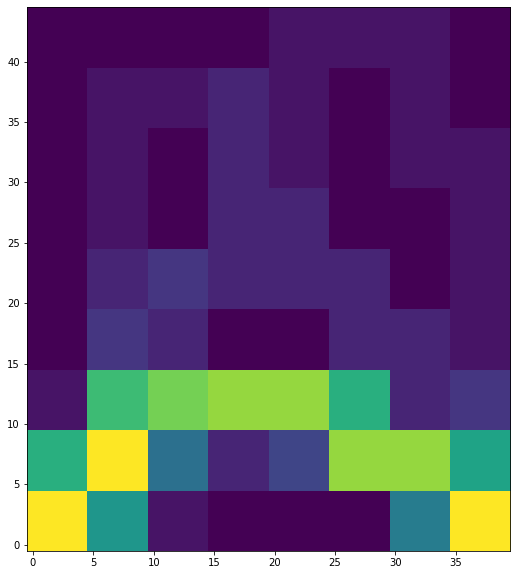

In [295]:
H, _, _ = np.histogram2d(disc_x_list, disc_z_list, bins=(x_edges, z_edges))
fig = plt.figure(figsize=(10, 10))
plt.imshow(H.T, interpolation='nearest', origin='lower',

        extent=[x_edges[0], x_edges[-1], z_edges[0], z_edges[-1]])

In [269]:
CS = len(disc_x_list)
CS

438

In [270]:
CP = sum(shocks_list)
CP

23

In [273]:
CSs = [421, 324, 251, 377, 317, 444, 440, 453, 432, 487, 358, 470, 265, 356, 386, 438]
CPs = [24, 99, 174, 52, 114, 50, 16, 17, 23, 25, 69, 18, 169, 147, 105, 23]

In [275]:
len(CPs)

16

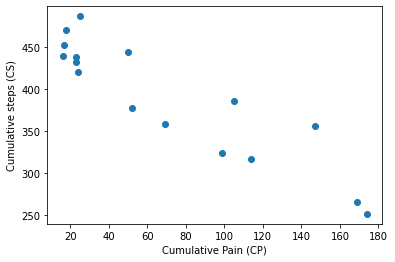

In [274]:
plt.scatter(CPs, CSs, cmap='hot')
plt.xlabel('Cumulative Pain (CP)')
plt.ylabel('Cumulative steps (CS)')
plt.show()

In [276]:
import scipy as sp

In [277]:
sp.stats.pearsonr(CSs, CPs)

PearsonRResult(statistic=-0.9132932828026943, pvalue=7.836053747712924e-07)